In [1]:
import numpy as np
import h5py

f = h5py.File("/oak/stanford/groups/akundaje/avsec/basepair/data/"
              +"processed/comparison/output/nexus,peaks,OSNK,0,10"
              +",1,FALSE,same,0.5,64,25,0.004,9,FALSE,[1,50],TRUE"
              +",FALSE,1/deeplift.imp_score.h5", "r")
#f = h5py.File("/users/avanti/deeplift.imp_score.h5","r")
nanog_mask = np.array(f['metadata']['interval_from_task'][:]=='Nanog')
nanog_profile_wn_hypimp = np.array(f["hyp_imp/Nanog/profile/wn"][:])[nanog_mask]
onehot_seq = np.array(f["inputs/seq"][:])[nanog_mask]
nanog_profile_wn_contribs = nanog_profile_wn_hypimp*onehot_seq

In [2]:
import modisco
track_set = modisco.tfmodisco_workflow.workflow.prep_track_set(
    task_names=["Nanog_profile_wn"],
    contrib_scores={'Nanog_profile_wn': nanog_profile_wn_contribs},
    hypothetical_contribs={'Nanog_profile_wn': nanog_profile_wn_hypimp},
    one_hot=onehot_seq)
grp = h5py.File("/oak/stanford/groups/akundaje/avsec/basepair/data/processed/comparison/output/nexus"
                +",peaks,OSNK,0,10,1,FALSE,same,0.5,64,25,0.004,9,FALSE,[1,50],TRUE,FALSE,1/deeplift"
                +"/Nanog/out/profile/wn/modisco.h5","r")
loaded_tfmodisco_results =\
    modisco.tfmodisco_workflow.workflow.TfModiscoResults.from_hdf5(grp, track_set=track_set)
grp.close()
patterns = (loaded_tfmodisco_results
            .metacluster_idx_to_submetacluster_results["metacluster_0"]
            .seqlets_to_patterns_result.patterns)

TF-MoDISco is using the TensorFlow backend.
/users/avanti/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/users/avanti/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/users/avanti/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/users/avanti/anaconda3/lib/python3

In [3]:
len(loaded_tfmodisco_results.multitask_seqlet_creation_results.final_seqlets)

98300

In [4]:
nanog_profile_wn_contribs.shape

(55233, 1000, 4)

In [5]:
#Saving the seqlets

"""extracted_contrib_scores = []
extracted_hypothetical_scores = []
extracted_onehot_seqs = []
seqlets_list = loaded_tfmodisco_results.multitask_seqlet_creation_results.final_seqlets

window_around = 50

#extract +/- 50bp around each seqlet
for seqlet in seqlets_list:
    example_idx = seqlet.coor.example_idx
    start = seqlet.coor.start
    end = seqlet.coor.end
    if ((start>=window_around) and (end<=1000-window_around)):
        extracted_contrib_scores.append(
            nanog_profile_wn_contribs[example_idx,start-window_around:end+window_around])
        extracted_hypothetical_scores.append(
            nanog_profile_wn_hypimp[example_idx,start-window_around:end+window_around])
        extracted_onehot_seqs.append(
            onehot_seq[example_idx,start-window_around:end+window_around])

np.save("extracted_contrib_scores.npy", np.array(extracted_contrib_scores))
np.save("extracted_hypothetical_scores.npy", np.array(extracted_hypothetical_scores))
np.save("extracted_onehot.npy", np.array(extracted_onehot_seqs))"""

'extracted_contrib_scores = []\nextracted_hypothetical_scores = []\nextracted_onehot_seqs = []\nseqlets_list = loaded_tfmodisco_results.multitask_seqlet_creation_results.final_seqlets\n\nwindow_around = 50\n\n#extract +/- 50bp around each seqlet\nfor seqlet in seqlets_list:\n    example_idx = seqlet.coor.example_idx\n    start = seqlet.coor.start\n    end = seqlet.coor.end\n    if ((start>=window_around) and (end<=1000-window_around)):\n        extracted_contrib_scores.append(\n            nanog_profile_wn_contribs[example_idx,start-window_around:end+window_around])\n        extracted_hypothetical_scores.append(\n            nanog_profile_wn_hypimp[example_idx,start-window_around:end+window_around])\n        extracted_onehot_seqs.append(\n            onehot_seq[example_idx,start-window_around:end+window_around])\n\nnp.save("extracted_contrib_scores.npy", np.array(extracted_contrib_scores))\nnp.save("extracted_hypothetical_scores.npy", np.array(extracted_hypothetical_scores))\nnp.save("

In [6]:
!ls

523a1a82c23711ea9f9157d4c043164e.bin
523a1a82c23711ea9f9157d4c043164e_graph.bin
523a1a82c23711ea9f9157d4c043164e_graph.weights
523a1a82c23711ea9f9157d4c043164e.tree
agkm_50kseqlets_allpattern_hits.txt
agkm_50kseqlets_esrrb_hits.txt
agkm_50kseqlets_goingin.txt
agkm_50kseqlets_laststage.txt
agkm_fewerseqlets_allpattern_hits.txt
agkm_fewerseqlets_esrrb_hits.txt
agkm_fewerseqlets_goingin.txt
agkm_fewerseqlets_laststage.txt
agkm_r2_allpattern_hits.txt
agkm_r2_esrrb_hits.txt
agkm_r2_goingin.txt
agkm_r2_laststage.txt
BpNet-Viz.ipynb
commit0975f52_l6g2m0_results.hdf5
commit20e04f_corrthresh0_nomemeinit_4layerembedding_results.hdf5
commit20e04f_corrthresh0p1_nomemeinit_4layerembedding_results.hdf5
commit20e04f_nomemeinit_4layerembedding_results.hdf5
commit891181_memeinit_l6g2m0_results.hdf5
commit891181_nomemeinit_l6g2m0_results.hdf5
commit97f7d5b_agkm_default_results.hdf5
commitb86c5a_l6g2m0_results.hdf5
copy_data.py
copy_model.sh
dcfeda32c23611ea9f9157d4c043164e.bin
deeplift.imp_score.h5
embe

In [7]:
#for i in range(10):
#    seqlets_list = loaded_tfmodisco_results.multitask_seqlet_creation_results.final_seqlets
#    modisco.visualization.viz_sequence.plot_weights(seqlets_list[i]["Nanog_profile_wn_contrib_scores"].fwd)

In [8]:
#visualize the saved patterns:
"""%matplotlib inline
from modisco.visualization import viz_sequence
for idx,pattern in enumerate(patterns):
    print("pattern idx",idx)
    print(len(pattern.seqlets))
    viz_sequence.plot_weights(
        pattern["Nanog_profile_wn_contrib_scores"].fwd)
    viz_sequence.plot_weights(pattern["sequence"].fwd)"""

'%matplotlib inline\nfrom modisco.visualization import viz_sequence\nfor idx,pattern in enumerate(patterns):\n    print("pattern idx",idx)\n    print(len(pattern.seqlets))\n    viz_sequence.plot_weights(\n        pattern["Nanog_profile_wn_contrib_scores"].fwd)\n    viz_sequence.plot_weights(pattern["sequence"].fwd)'

/mnt/lab_data2/avanti/tfmodisco
commit fd40813d8187cc46f29312fed1bb9fc35fe85cf3 (HEAD -> master, tag: v0.5.8.0, origin/master, origin/HEAD)
Author: Av Shrikumar <avanti.shrikumar@gmail.com>
Date:   Wed Aug 26 13:10:21 2020 -0700

    v0.5.8.0
/mnt/lab_data2/avanti/tfmodisco_bio_experiments/bpnet/trial1
MEMORY 4.41657344
On task Nanog_profile_wn
Computing windowed sums on original
Generating null dist
peak(mu)= 0.00754788601747714
Computing threshold
Thresholds from null dist were -0.026598811149597168  and  0.2509317398071289
Passing windows frac was 0.04676685078463518 , which is above  0.03 ; adjusting
Final raw thresholds are -0.3184376752376554  and  0.3184376752376554
Final transformed thresholds are -0.9699999852203116  and  0.9699999852203116


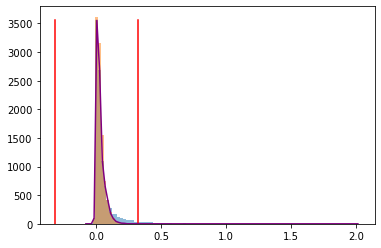

Got 98300 coords
After resolving overlaps, got 98300 seqlets
Across all tasks, the weakest transformed threshold used was: 0.9698999852203116
MEMORY 6.31916544
98300 identified in total
1 activity patterns with support >= 2000 out of 2 possible patterns
Metacluster sizes:  [98297]
Idx to activities:  {0: '1'}
MEMORY 6.319972352
On metacluster 0
Metacluster size 98297 limited to 50000
Relevant tasks:  ('Nanog_profile_wn',)
Relevant signs:  (1,)
TfModiscoSeqletsToPatternsFactory: seed=1234
(Round 1) num seqlets: 50000
(Round 1) Computing coarse affmat
MEMORY 6.319714304
Beginning embedding computation


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    5.9s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    9.5s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:   15.6s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:   23.8s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:   33.8s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:   45.8s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:   59.3s
[Parallel(n_jobs=10)]: Done 3180 tasks      | elapsed:  1.3min
[Parallel(n_jobs=10)]: Done 4030 tasks      | elapsed:  1.6min
[Parallel(n_jobs=10)]: Done 4980 tasks      | elapsed:  2.0min
[Parallel(n_jobs=10)]: Done 6030 tasks      | elapsed:  2.3min
[Parallel(n_jobs=10)]: Done 7180 tasks      | elapsed:  2.8min
[Parallel(n_jobs=10)]: Done 8430 tasks      | elapsed:  3.3min
[Parallel(n_jobs=10)]: Done 9780 tasks      | elapsed:  3.7min
[Parallel(n_jobs=10)]: Done 11230 tasks      

Constructing csr matrix...
csr matrix made in 169.60988998413086 s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 50000 out of 50000 | elapsed: 16.0min finished


Constructing csr matrix...
csr matrix made in 115.12940883636475 s
Finished embedding computation in 4906.0 s
Starting affinity matrix computations
Batching in slices of size 500


100%|██████████| 100/100 [51:21<00:00, 30.81s/it]


Batching in slices of size 500


100%|██████████| 100/100 [57:34<00:00, 34.55s/it]


Finished affinity matrix computations in 6741.31 s
(Round 1) Compute nearest neighbors from coarse affmat
MEMORY 50.530963456
Computed nearest neighbors in 281.07 s
MEMORY 50.530955264
(Round 1) Computing affinity matrix on nearest neighbors
MEMORY 50.530955264
Launching nearest neighbors affmat calculation job
MEMORY 50.53095936
Parallel runs completed
MEMORY 50.975956992
Job completed in: 355.73 s
MEMORY 70.557745152
Launching nearest neighbors affmat calculation job
MEMORY 70.557745152
Parallel runs completed
MEMORY 70.600957952
Job completed in: 351.11 s
MEMORY 90.246905856
(Round 1) Computed affinity matrix on nearest neighbors in 736.37 s
MEMORY 70.893416448
Filtered down to 37189 of 50000
(Round 1) Retained 37189 rows out of 50000 after filtering
MEMORY 70.897700864
(Round 1) Computing density adapted affmat
MEMORY 41.961873408
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 37189 samples in 2.164s...
[t-SNE] Computed neighbors for 37189 samples in 9.274s...
[t-SNE] Co

  0%|          | 0/50 [00:00<?, ?it/s]

Quality: 0.758389948473155


  2%|▏         | 1/50 [00:47<38:38, 47.31s/it]

Quality: 0.7589504015834071


 46%|████▌     | 23/50 [21:17<21:12, 47.13s/it]

Quality: 0.7590454195818871


100%|██████████| 50/50 [42:52<00:00, 51.44s/it]


Got 42 clusters after round 1
Counts:
{18: 730, 5: 1973, 7: 1752, 9: 1521, 4: 2100, 16: 960, 3: 2389, 8: 1529, 6: 1819, 13: 1260, 15: 971, 14: 1245, 11: 1342, 10: 1448, 21: 600, 0: 3514, 2: 2762, 1: 3076, 25: 394, 12: 1321, 20: 610, 28: 127, 19: 654, 35: 20, 22: 545, 17: 902, 24: 429, 26: 164, 41: 11, 36: 20, 27: 143, 31: 47, 30: 83, 29: 107, 37: 16, 23: 447, 34: 30, 33: 44, 40: 12, 32: 44, 39: 14, 38: 14}
MEMORY 30.779387904
(Round 1) Aggregating seqlets in each cluster
MEMORY 30.779387904
Aggregating for cluster 0 with 3514 seqlets
MEMORY 30.779404288
Trimmed 86 out of 3514
Removed 1 duplicate seqlets
Aggregating for cluster 1 with 3076 seqlets
MEMORY 30.779322368
Trimmed 101 out of 3076
Aggregating for cluster 2 with 2762 seqlets
MEMORY 30.779322368
Trimmed 97 out of 2762
Aggregating for cluster 3 with 2389 seqlets
MEMORY 30.779322368
Trimmed 60 out of 2389
Removed 14 duplicate seqlets
Aggregating for cluster 4 with 2100 seqlets
MEMORY 30.779322368
Trimmed 152 out of 2100
Aggregatin

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   19.9s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:   32.1s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:   46.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:  1.7min
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:  1.9min
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:  2.1min
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:  2.4min
[Parallel(n_jobs=10)]: Done 3180 tasks      | elapsed:  2.7min
[Parallel(n_jobs=10)]: Done 4030 tasks      | elapsed:  3.8min
[Parallel(n_jobs=10)]: Done 4980 tasks      | elapsed:  5.6min
[Parallel(n_jobs=10)]: Done 6030 tasks      | elapsed:  7.0min
[Parallel(n_jobs=10)]: Done 7180 tasks      | elapsed:  8.1min
[Parallel(n_jobs=10)]: Done 8430 tasks      | elapsed:  9.5min
[Parallel(n_jobs=10)]: Done 9780 tasks      | elapsed: 10.1min
[Parallel(n_jobs=10)]: Done 11230 tasks      

Constructing csr matrix...
csr matrix made in 107.9087700843811 s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 34102 out of 34102 | elapsed:  7.1min finished


Constructing csr matrix...
csr matrix made in 35.36408090591431 s
Finished embedding computation in 3165.59 s
Starting affinity matrix computations
Batching in slices of size 500


100%|██████████| 69/69 [14:25<00:00, 12.55s/it]


Batching in slices of size 500


100%|██████████| 69/69 [16:39<00:00, 14.48s/it]


Finished affinity matrix computations in 2207.39 s
(Round 2) Compute nearest neighbors from coarse affmat
MEMORY 43.716681728
Computed nearest neighbors in 132.42 s
MEMORY 43.662024704
(Round 2) Computing affinity matrix on nearest neighbors
MEMORY 43.662041088
Launching nearest neighbors affmat calculation job
MEMORY 43.683012608
Parallel runs completed
MEMORY 44.011761664
Job completed in: 379.36 s
MEMORY 43.500306432
Launching nearest neighbors affmat calculation job
MEMORY 43.476713472
Parallel runs completed
MEMORY 43.537649664
Job completed in: 351.88 s
MEMORY 50.250022912
(Round 2) Computed affinity matrix on nearest neighbors in 752.03 s
MEMORY 46.12857856
Not applying filtering for rounds above first round
MEMORY 46.12857856
(Round 2) Computing density adapted affmat
MEMORY 36.819161088
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 34102 samples in 1.707s...
[t-SNE] Computed neighbors for 34102 samples in 7.655s...
[t-SNE] Computed conditional probabilities for sam

  0%|          | 0/50 [00:00<?, ?it/s]

Quality: 0.7353825617790664


  6%|▌         | 3/50 [02:20<39:00, 49.80s/it]

Quality: 0.7354661589622618


  8%|▊         | 4/50 [03:29<42:42, 55.70s/it]

Quality: 0.7355857717190348


 12%|█▏        | 6/50 [04:43<34:17, 46.75s/it]

Quality: 0.7357410979170347


 16%|█▌        | 8/50 [06:37<36:23, 52.00s/it]

Quality: 0.7364331030972611


 64%|██████▍   | 32/50 [25:26<12:58, 43.27s/it]

Quality: 0.7364926143508063


100%|██████████| 50/50 [39:35<00:00, 47.52s/it]


Got 39 clusters after round 2
Counts:
{0: 4454, 14: 827, 5: 1887, 11: 1138, 6: 1860, 1: 2921, 4: 2358, 23: 134, 12: 1112, 9: 1639, 10: 1526, 2: 2738, 16: 729, 25: 76, 22: 275, 13: 1023, 7: 1828, 15: 799, 8: 1645, 3: 2728, 19: 368, 29: 46, 36: 11, 20: 347, 17: 488, 31: 35, 26: 56, 18: 430, 38: 5, 28: 51, 24: 80, 21: 312, 30: 36, 27: 53, 34: 17, 37: 10, 32: 29, 33: 17, 35: 14}
MEMORY 27.51412224
(Round 2) Aggregating seqlets in each cluster
MEMORY 27.51412224
Aggregating for cluster 0 with 4454 seqlets
MEMORY 27.514146816
Trimmed 164 out of 4454
Removed 50 duplicate seqlets
Aggregating for cluster 1 with 2921 seqlets
MEMORY 27.544260608
Trimmed 269 out of 2921
Removed 42 duplicate seqlets
Aggregating for cluster 2 with 2738 seqlets
MEMORY 27.55524608
Trimmed 256 out of 2738
Removed 12 duplicate seqlets
Aggregating for cluster 3 with 2728 seqlets
MEMORY 27.565195264
Trimmed 267 out of 2728
Aggregating for cluster 4 with 2358 seqlets
MEMORY 27.576057856
Trimmed 124 out of 2358
Skipped 1 se

After 3 runs, maximum modularity is Q = 0.00386416
Louvain completed 23 runs in 47.1540629863739 seconds
Similarity is 0.9392388; is_dissimilar is False
Inspecting for spurious merging
Wrote graph to binary file in 3.0386836528778076 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.00471767
After 2 runs, maximum modularity is Q = 0.00471821
Louvain completed 22 runs in 49.09752011299133 seconds
Similarity is 0.86290574; is_dissimilar is False
Inspecting for spurious merging
Wrote graph to binary file in 1.5516366958618164 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.00600461
Louvain completed 21 runs in 43.33560609817505 seconds
Similarity is 0.86389977; is_dissimilar is False
Inspecting for spurious merging
Wrote graph to binary file in 1.4184412956237793 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.0131254
Louvain completed 21 runs in 37.63445067405701 se

Wrote graph to binary file in 0.024283409118652344 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.00877181
After 2 runs, maximum modularity is Q = 0.00880961
After 3 runs, maximum modularity is Q = 0.0100364
After 5 runs, maximum modularity is Q = 0.0111501
Louvain completed 25 runs in 49.29175090789795 seconds
Similarity is 0.68029255; is_dissimilar is True
Inspecting for spurious merging
Wrote graph to binary file in 0.017093658447265625 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.00804788
Louvain completed 21 runs in 35.19572329521179 seconds
Similarity is 0.8273873; is_dissimilar is False
Inspecting for spurious merging
Wrote graph to binary file in 0.008075714111328125 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.00499569
After 3 runs, maximum modularity is Q = 0.0050507
After 5 runs, maximum modularity is Q = 0.00513442
Louvain completed 25 runs in

In [9]:
#print modisco commit hash
%cd /users/avanti/tfmodisco
!git log -n 1
%cd /users/avanti/tfmodisco_bio_experiments/bpnet/trial1

from importlib import reload

%matplotlib inline
import h5py
import numpy as np
import modisco
import modisco.seqlet_embedding.advanced_gapped_kmer
reload(modisco.seqlet_embedding.advanced_gapped_kmer)
import modisco.seqlet_embedding
reload(modisco.seqlet_embedding)
import modisco
reload(modisco)
import modisco.cluster.phenograph.core
reload(modisco.cluster.phenograph.core)
import modisco.cluster.phenograph.cluster
reload(modisco.cluster.phenograph.cluster)
import modisco.cluster.phenograph
reload(modisco.cluster.phenograph)
import modisco.cluster.core
reload(modisco.cluster.core)
import modisco.cluster
reload(modisco.cluster)
import modisco.affinitymat.core
reload(modisco.affinitymat.core)
import modisco.affinitymat.transformers
reload(modisco.affinitymat.transformers)
import modisco.tfmodisco_workflow.seqlets_to_patterns
reload(modisco.tfmodisco_workflow.seqlets_to_patterns)
import modisco.tfmodisco_workflow.workflow
reload(modisco.tfmodisco_workflow.workflow)
import modisco.nearest_neighbors
reload(modisco.nearest_neighbors)
import modisco.affinitymat
reload(modisco.affinitymat)
import modisco.aggregator
reload(modisco.aggregator)
import modisco.value_provider
reload(modisco.value_provider)
import modisco.core
reload(modisco.core)
import modisco.coordproducers
reload(modisco.coordproducers)
import modisco.metaclusterers
reload(modisco.metaclusterers)
import modisco.clusterinit.memeinit
reload(modisco.clusterinit.memeinit)

%matplotlib inline

N_CORES = 10
workflow = modisco.tfmodisco_workflow.workflow.TfModiscoWorkflow(
    sliding_window_size=21,
    flank_size=10,
    target_seqlet_fdr=0.01,
    min_passing_windows_frac=0.03,
    max_passing_windows_frac=0.03,
    min_metacluster_size=2000,
    min_metacluster_size_frac=0.02,
    max_seqlets_per_metacluster=50000,
    seqlets_to_patterns_factory=
      modisco.tfmodisco_workflow.seqlets_to_patterns.TfModiscoSeqletsToPatternsFactory(
        #initclusterer_factory=modisco.clusterinit.memeinit.MemeInitClustererFactory(    
        #                meme_command="/software/meme/5.0.1/bin/meme",
        #                base_outdir="meme_out",            
        #                num_seqlets_to_use=10000,
        #                nmotifs=20, n_jobs=4),
        use_louvain=False,
        trim_to_window_size=30,
        initial_flank_to_add=10,
        
        embedder_factory=modisco.seqlet_embedding
                         .advanced_gapped_kmer
                         .AdvancedGappedKmerEmbedderFactory(n_jobs=N_CORES),
        #kmer_len=6,
        #num_gaps=2,
        #num_mismatches=0,        
        n_cores=N_CORES,
        final_min_cluster_size=60
    )
)

results = workflow(
    task_names=["Nanog_profile_wn"],
    contrib_scores={'Nanog_profile_wn': nanog_profile_wn_contribs},
    hypothetical_contribs={'Nanog_profile_wn': nanog_profile_wn_hypimp},
    one_hot=onehot_seq)

In [10]:
import h5py
import modisco.util
reload(modisco.util)
import os

file_path = "v0.5.8.0_agkm_default_results.hdf5"
if (os.path.exists(file_path)):
    os.remove(file_path)
grp = h5py.File(file_path, "w")
results.save_hdf5(grp)
grp.close()

metacluster_0
activity pattern: [1]
metacluster_0 pattern_0
total seqlets: 8066
Task 0 hypothetical scores:


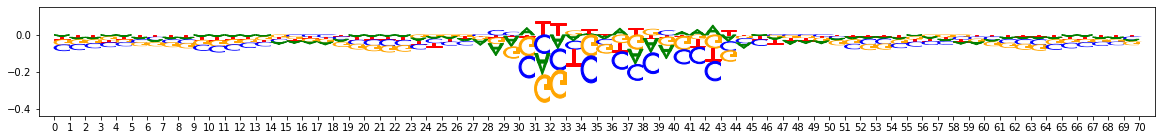

Task 0 actual importance scores:


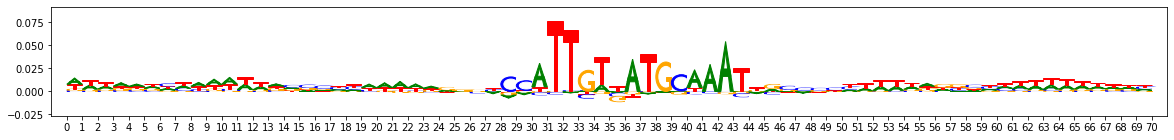

onehot, fwd and rev:


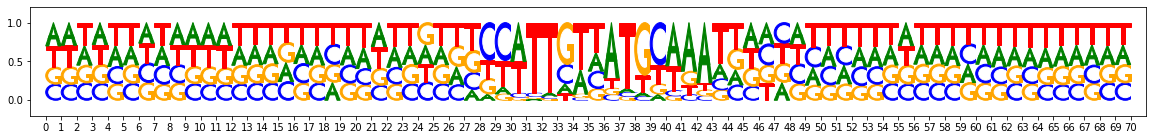

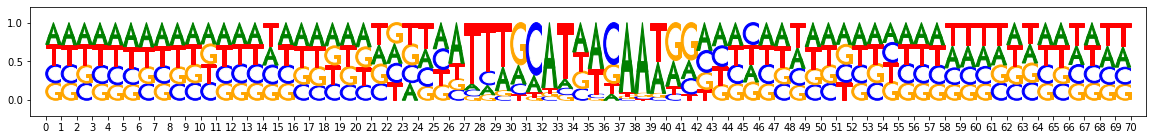

metacluster_0 pattern_1
total seqlets: 2648
Task 0 hypothetical scores:


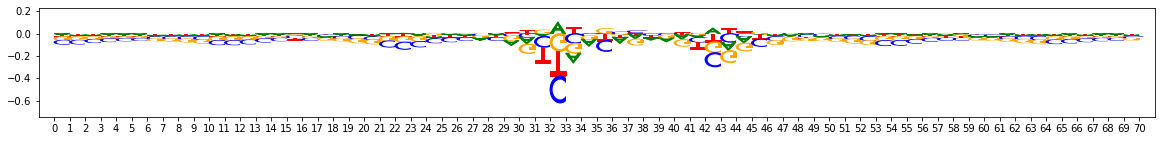

Task 0 actual importance scores:


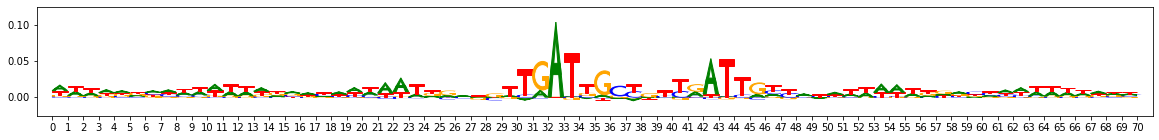

onehot, fwd and rev:


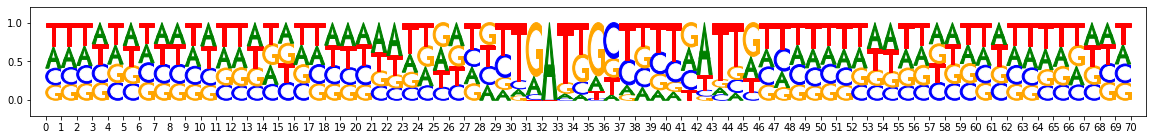

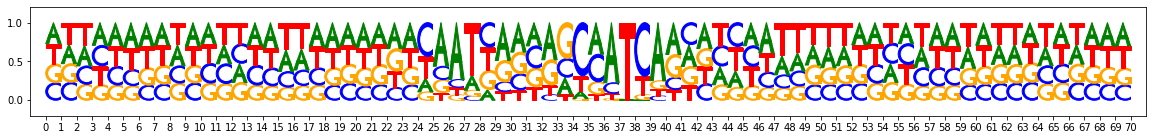

metacluster_0 pattern_2
total seqlets: 2490
Task 0 hypothetical scores:


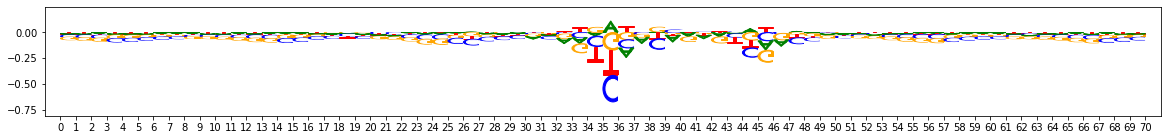

Task 0 actual importance scores:


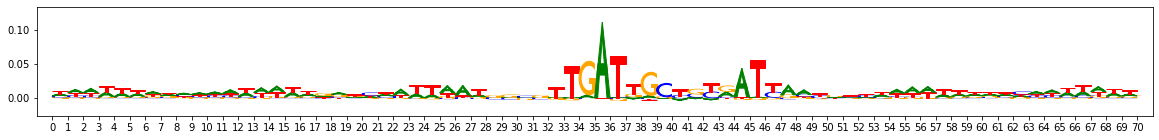

onehot, fwd and rev:


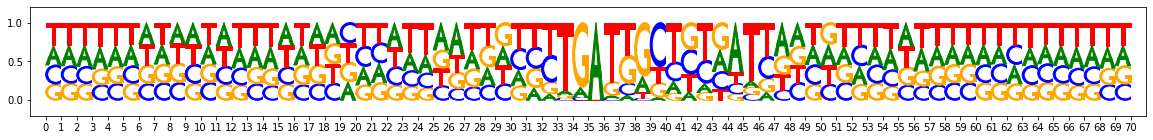

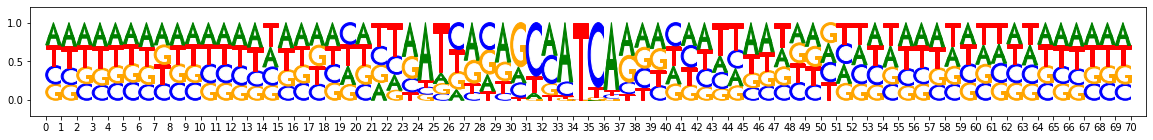

metacluster_0 pattern_3
total seqlets: 2470
Task 0 hypothetical scores:


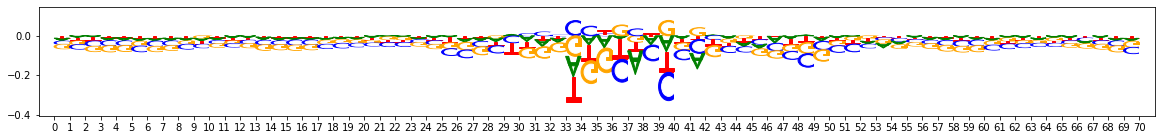

Task 0 actual importance scores:


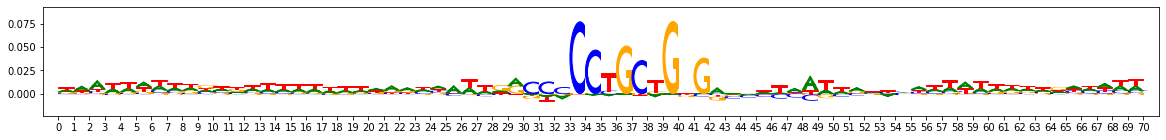

onehot, fwd and rev:


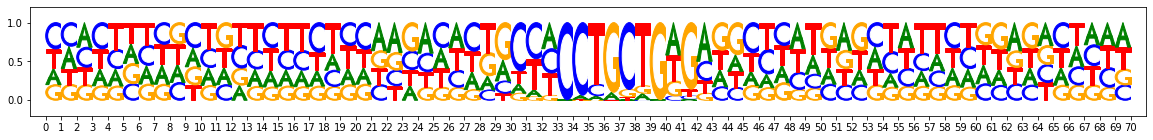

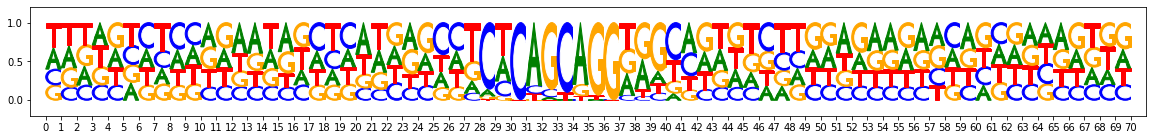

metacluster_0 pattern_4
total seqlets: 1675
Task 0 hypothetical scores:


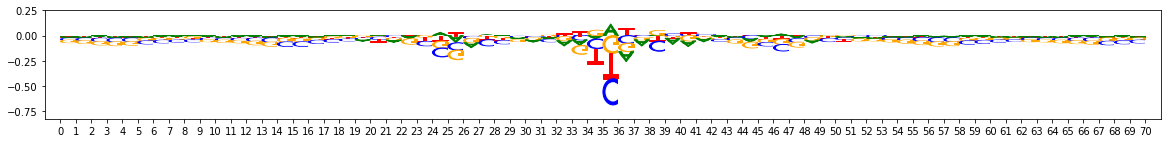

Task 0 actual importance scores:


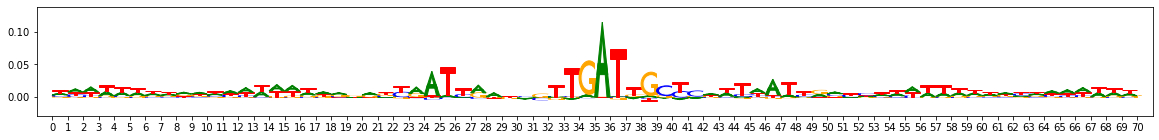

onehot, fwd and rev:


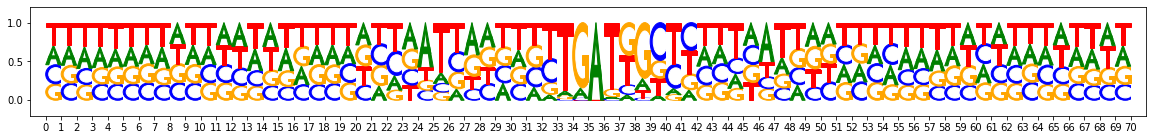

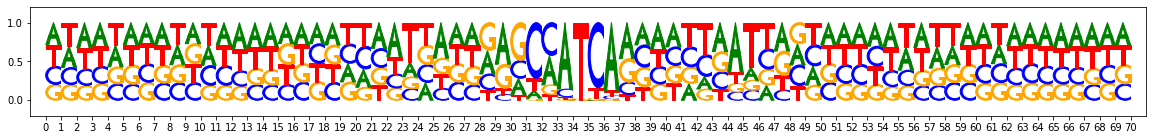

metacluster_0 pattern_5
total seqlets: 1433
Task 0 hypothetical scores:


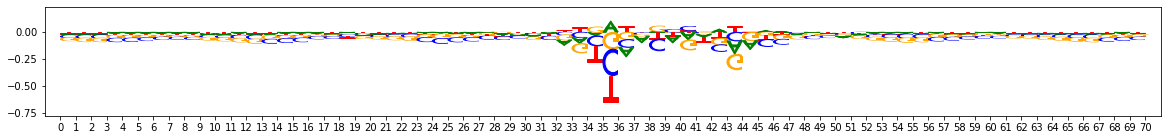

Task 0 actual importance scores:


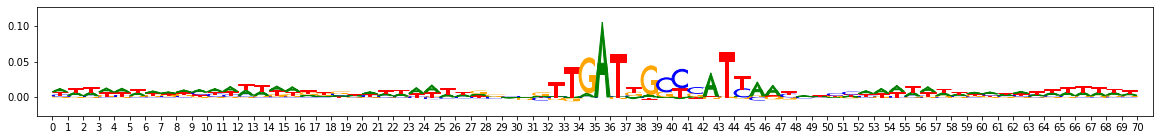

onehot, fwd and rev:


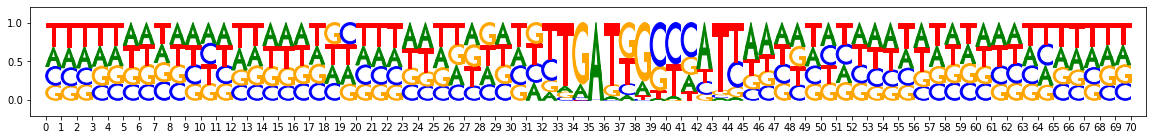

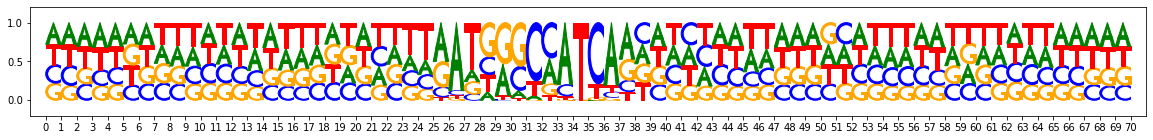

metacluster_0 pattern_6
total seqlets: 1411
Task 0 hypothetical scores:


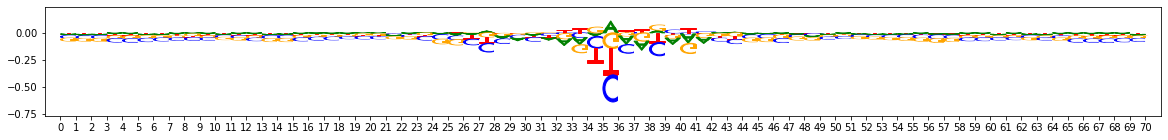

Task 0 actual importance scores:


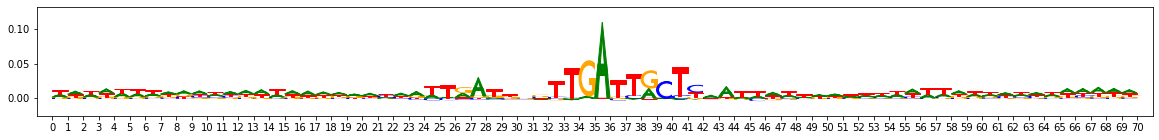

onehot, fwd and rev:


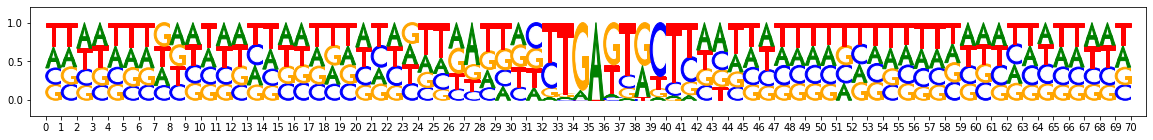

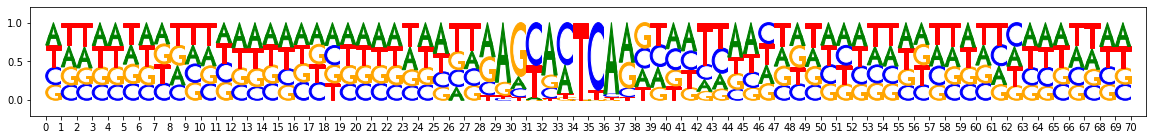

metacluster_0 pattern_7
total seqlets: 1396
Task 0 hypothetical scores:


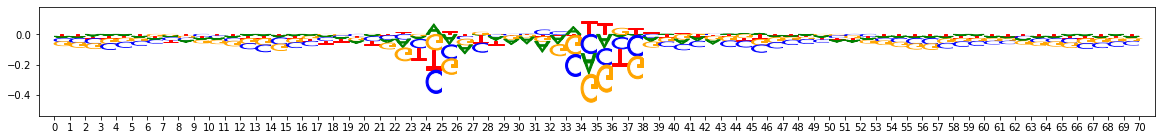

Task 0 actual importance scores:


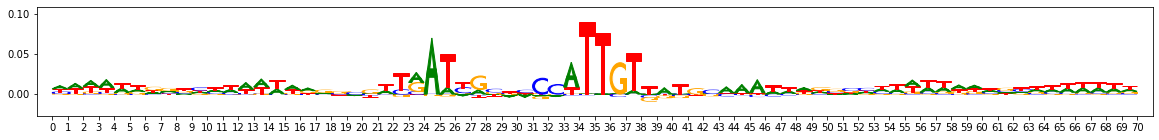

onehot, fwd and rev:


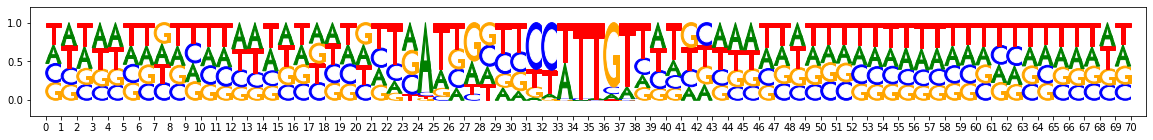

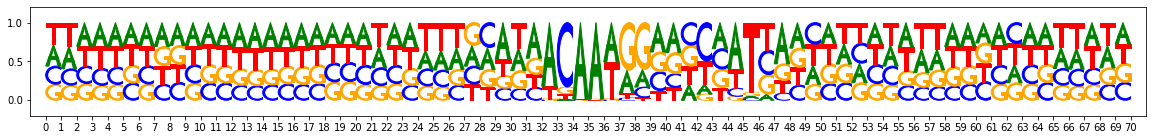

metacluster_0 pattern_8
total seqlets: 999
Task 0 hypothetical scores:


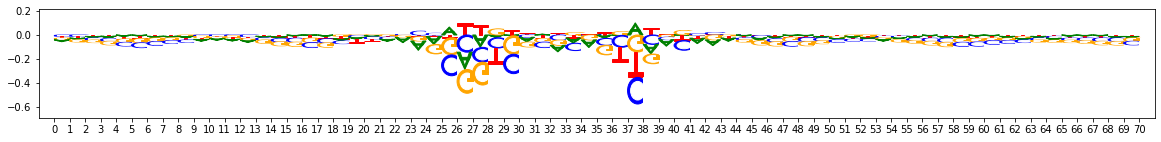

Task 0 actual importance scores:


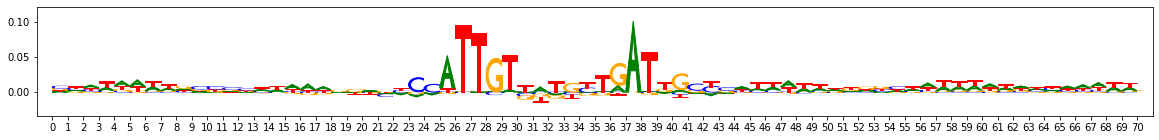

onehot, fwd and rev:


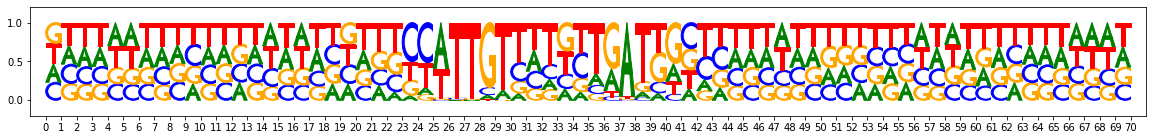

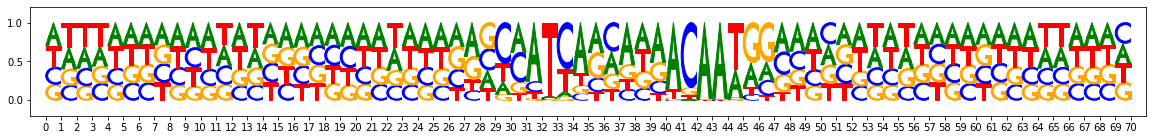

metacluster_0 pattern_9
total seqlets: 990
Task 0 hypothetical scores:


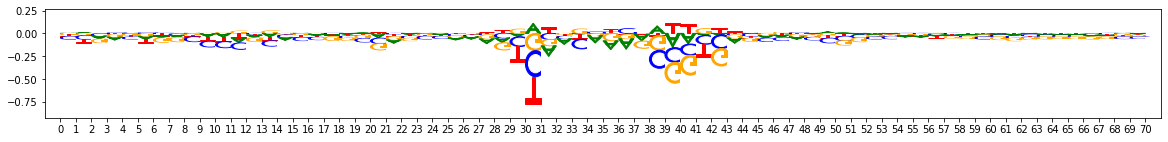

Task 0 actual importance scores:


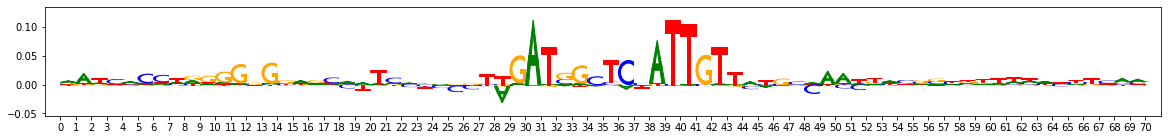

onehot, fwd and rev:


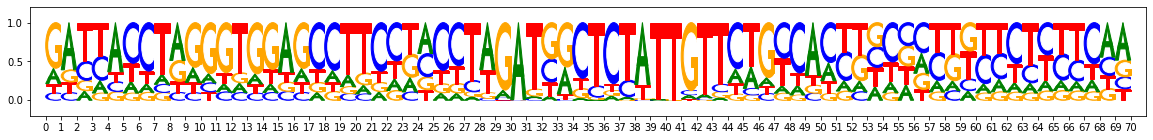

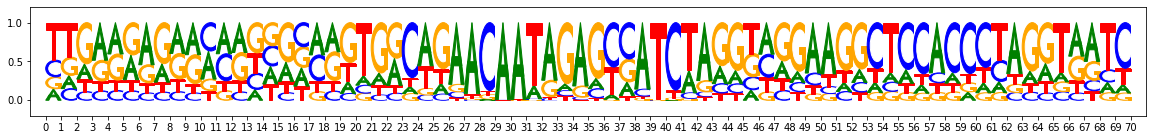

metacluster_0 pattern_10
total seqlets: 942
Task 0 hypothetical scores:


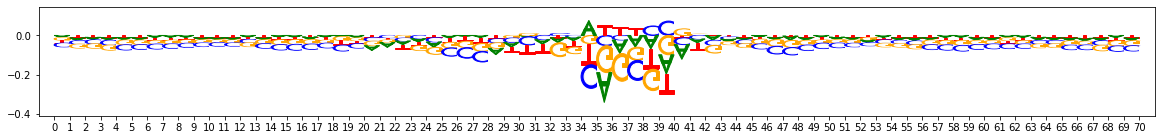

Task 0 actual importance scores:


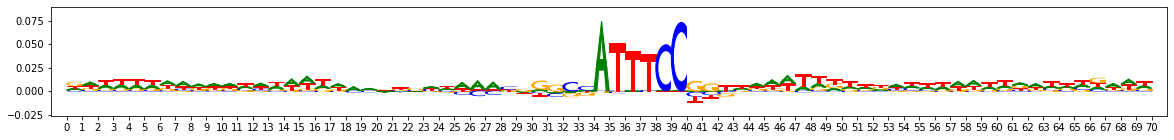

onehot, fwd and rev:


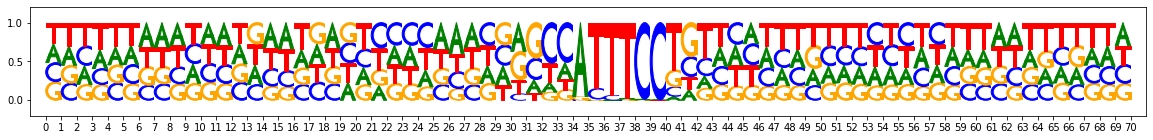

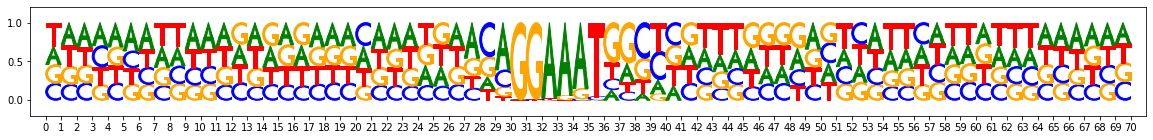

metacluster_0 pattern_11
total seqlets: 880
Task 0 hypothetical scores:


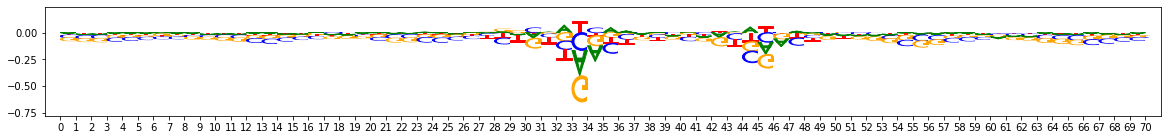

Task 0 actual importance scores:


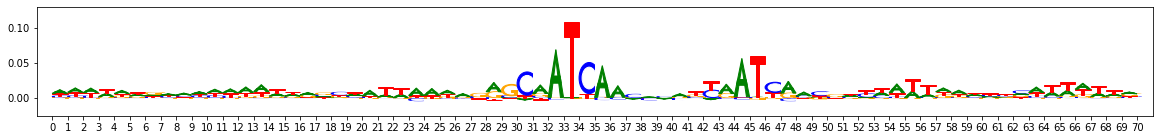

onehot, fwd and rev:


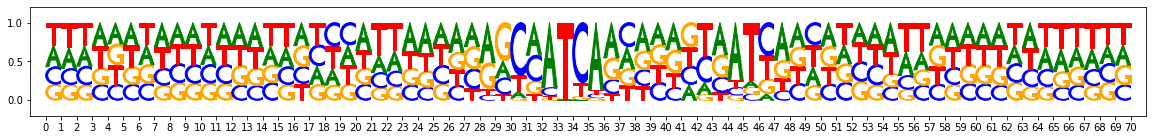

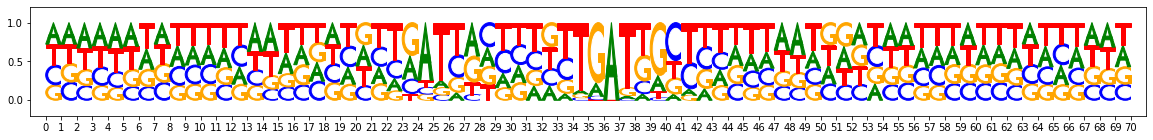

metacluster_0 pattern_12
total seqlets: 773
Task 0 hypothetical scores:


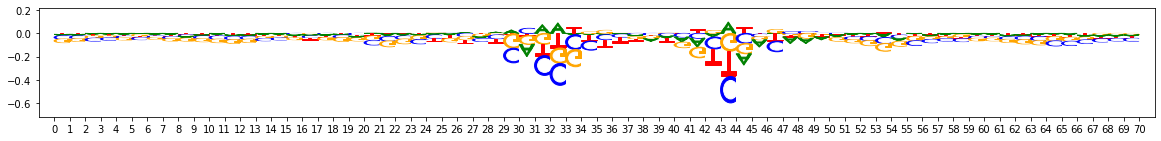

Task 0 actual importance scores:


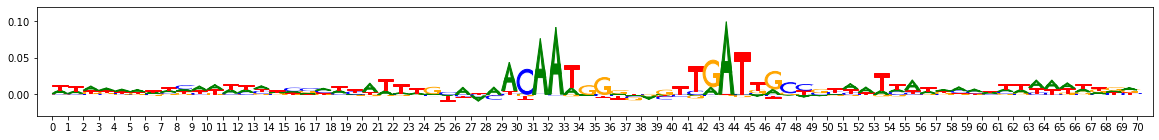

onehot, fwd and rev:


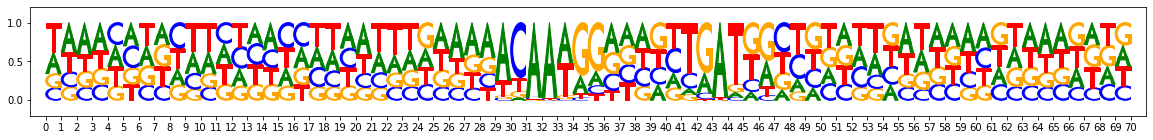

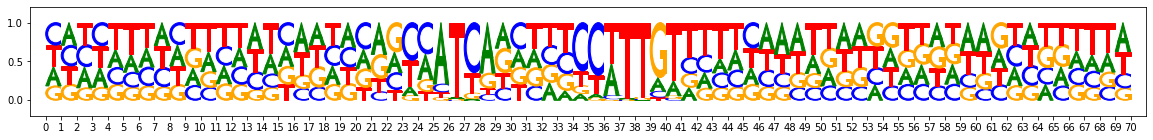

metacluster_0 pattern_13
total seqlets: 734
Task 0 hypothetical scores:


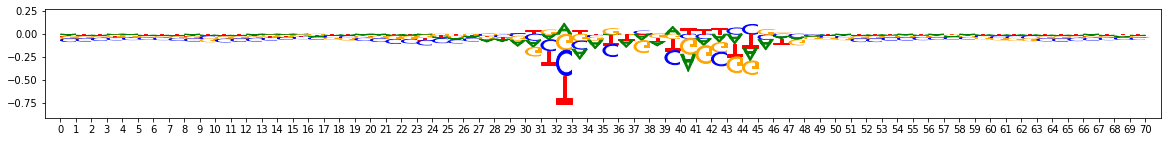

Task 0 actual importance scores:


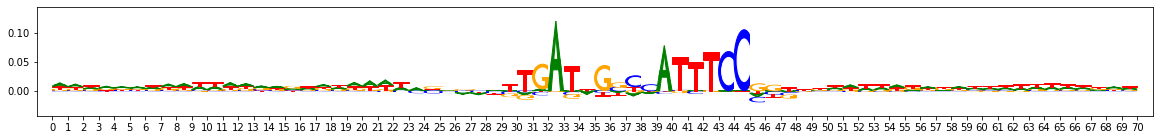

onehot, fwd and rev:


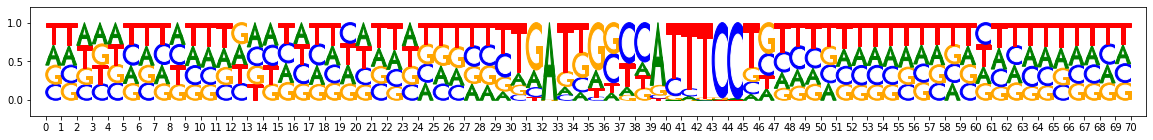

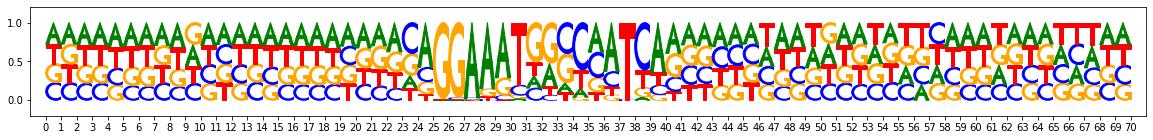

metacluster_0 pattern_14
total seqlets: 365
Task 0 hypothetical scores:


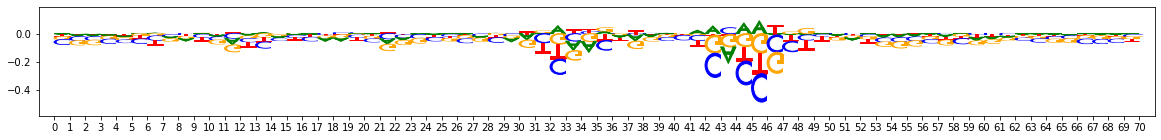

Task 0 actual importance scores:


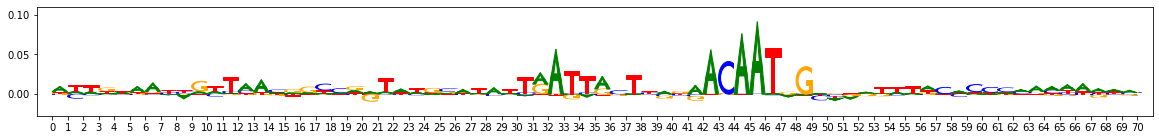

onehot, fwd and rev:


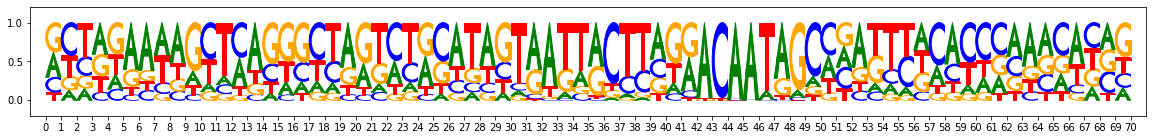

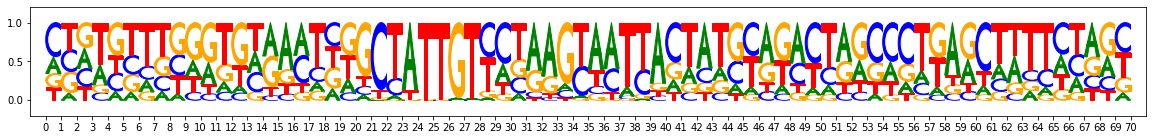

metacluster_0 pattern_15
total seqlets: 370
Task 0 hypothetical scores:


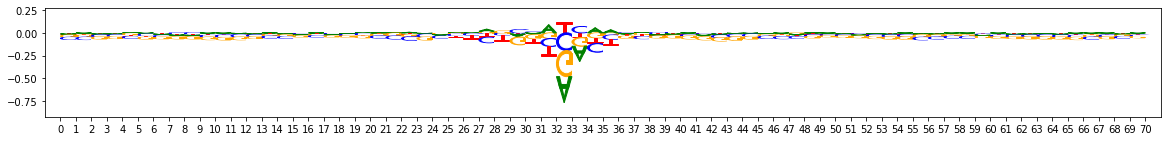

Task 0 actual importance scores:


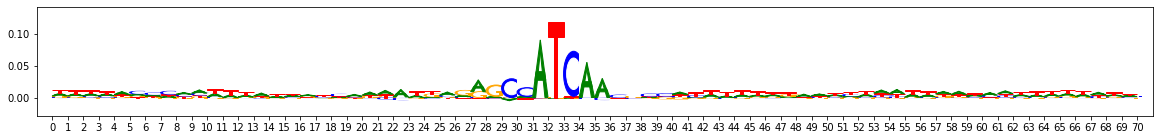

onehot, fwd and rev:


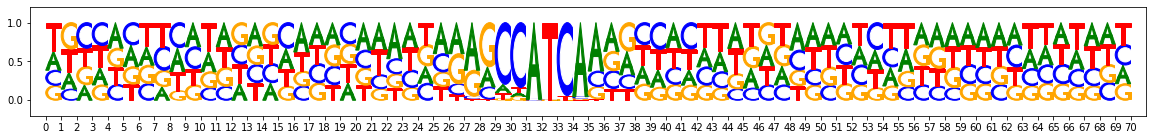

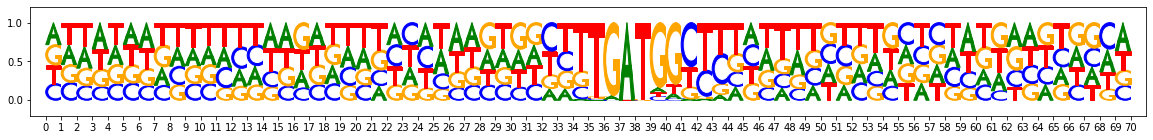

metacluster_0 pattern_16
total seqlets: 345
Task 0 hypothetical scores:


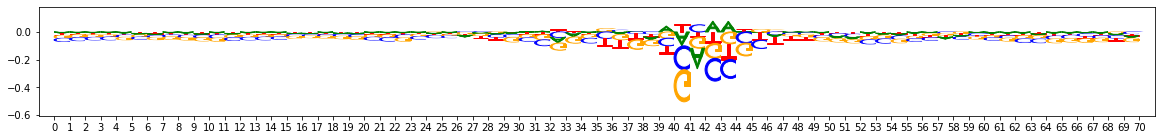

Task 0 actual importance scores:


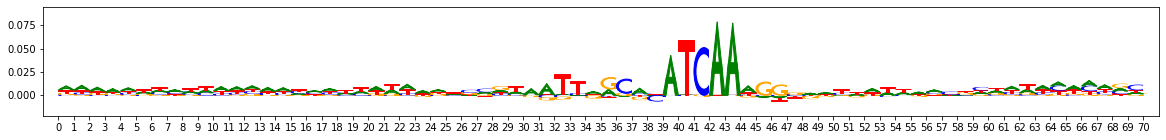

onehot, fwd and rev:


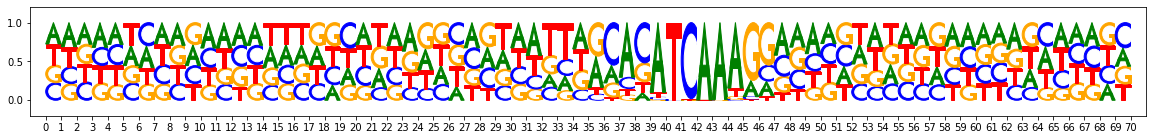

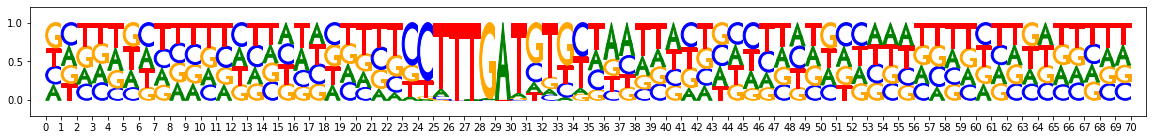

metacluster_0 pattern_17
total seqlets: 316
Task 0 hypothetical scores:


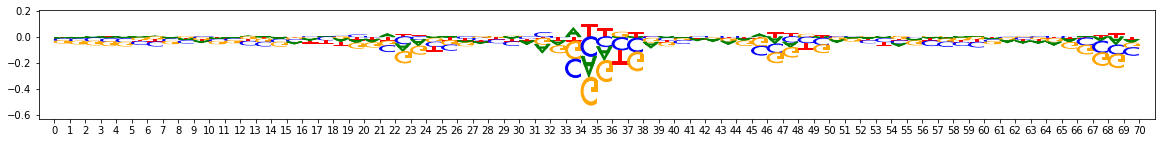

Task 0 actual importance scores:


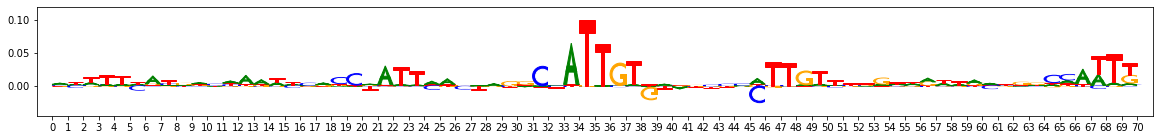

onehot, fwd and rev:


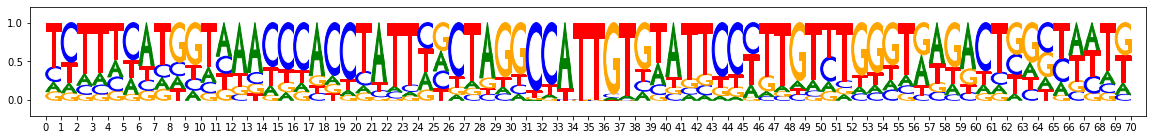

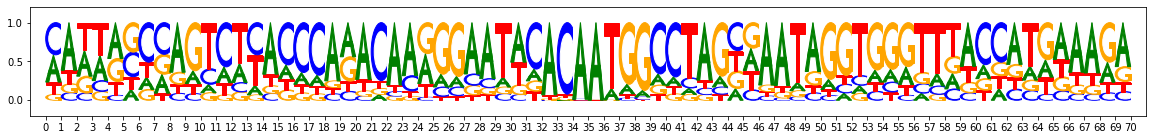

metacluster_0 pattern_18
total seqlets: 286
Task 0 hypothetical scores:


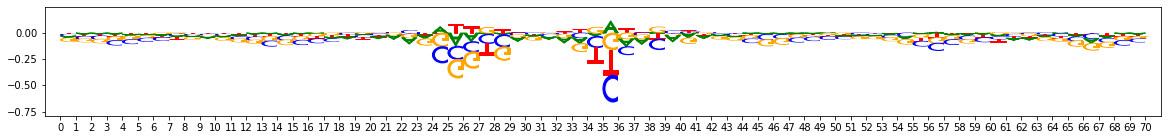

Task 0 actual importance scores:


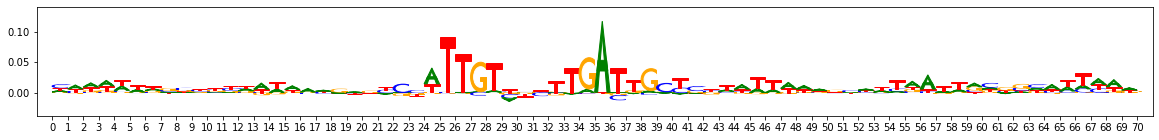

onehot, fwd and rev:


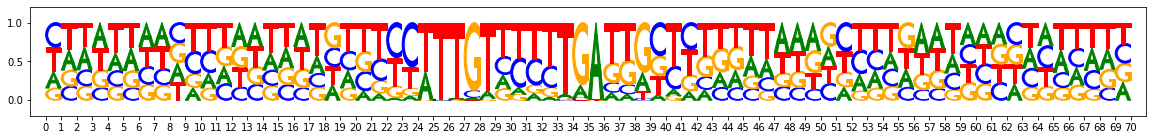

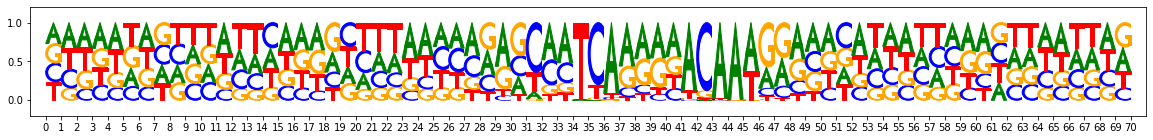

metacluster_0 pattern_19
total seqlets: 286
Task 0 hypothetical scores:


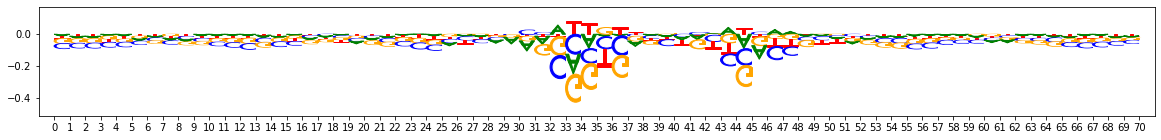

Task 0 actual importance scores:


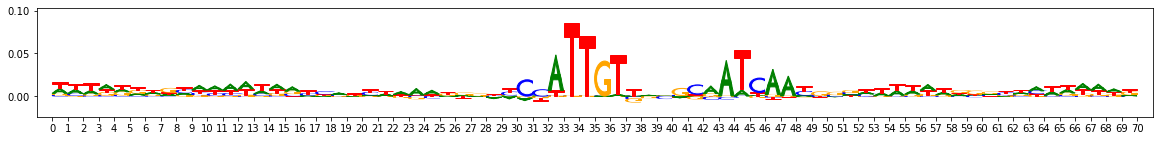

onehot, fwd and rev:


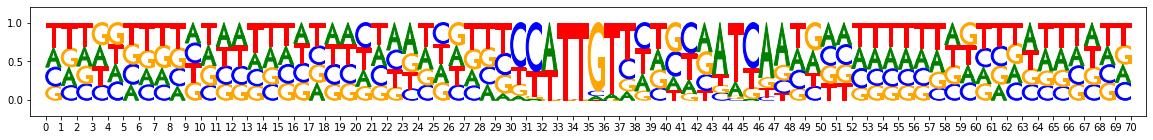

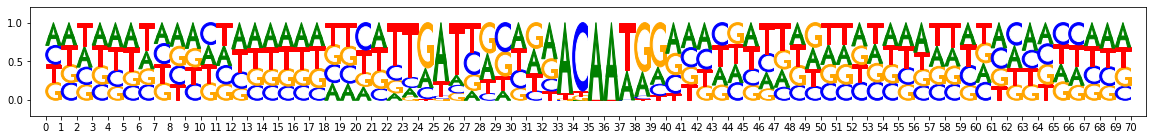

metacluster_0 pattern_20
total seqlets: 219
Task 0 hypothetical scores:


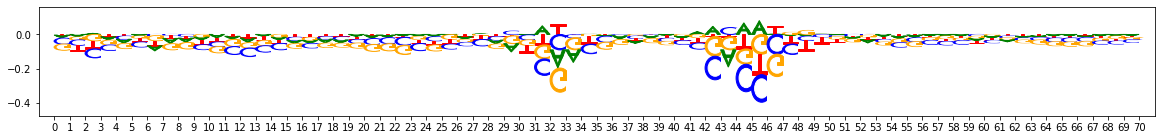

Task 0 actual importance scores:


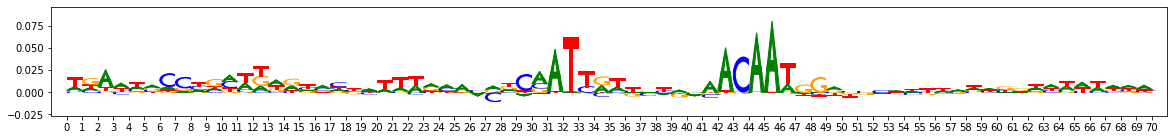

onehot, fwd and rev:


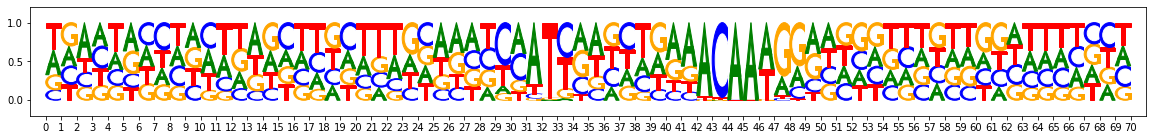

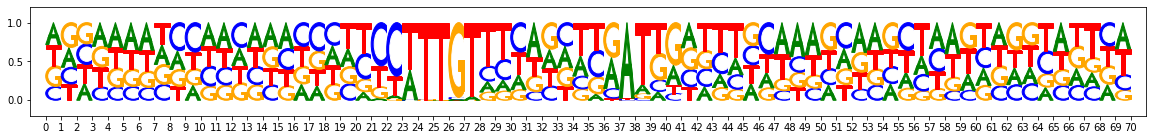

metacluster_0 pattern_21
total seqlets: 153
Task 0 hypothetical scores:


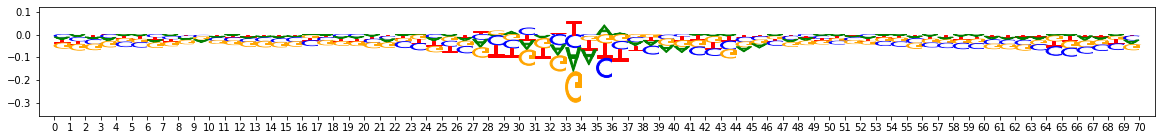

Task 0 actual importance scores:


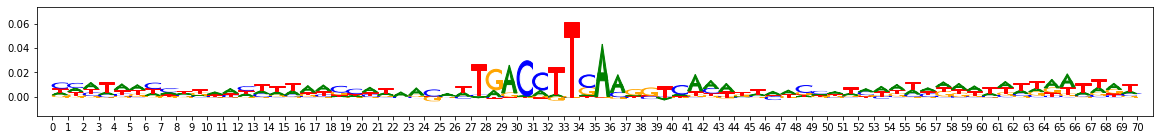

onehot, fwd and rev:


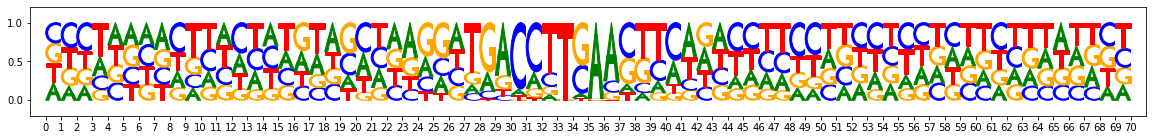

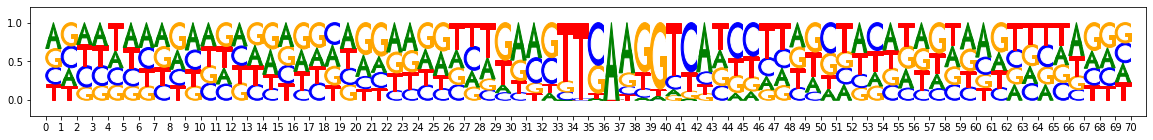

metacluster_0 pattern_22
total seqlets: 100
Task 0 hypothetical scores:


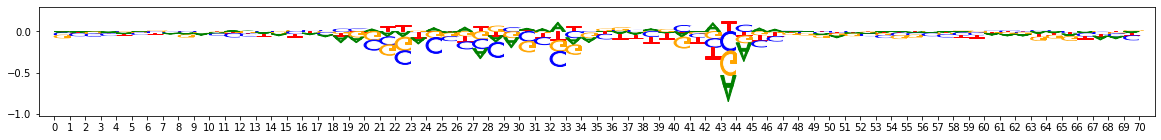

Task 0 actual importance scores:


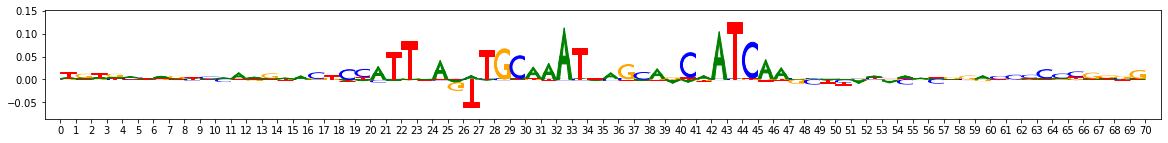

onehot, fwd and rev:


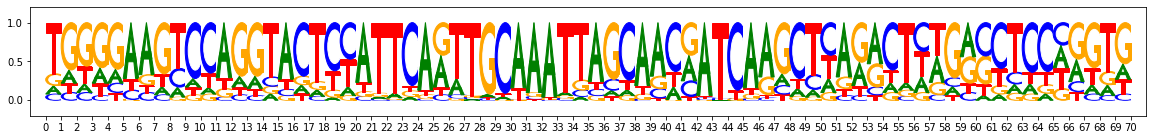

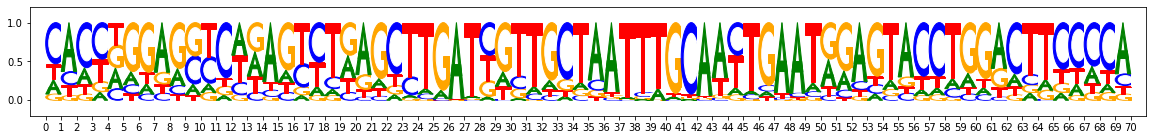

metacluster_0 pattern_23
total seqlets: 99
Task 0 hypothetical scores:


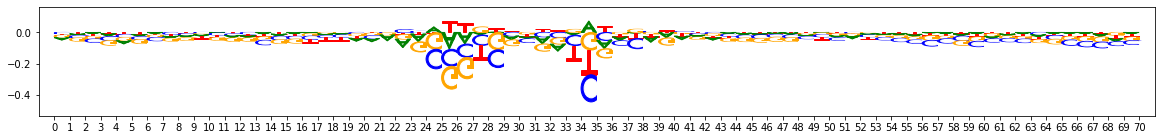

Task 0 actual importance scores:


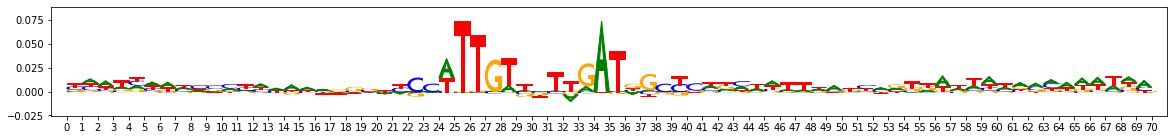

onehot, fwd and rev:


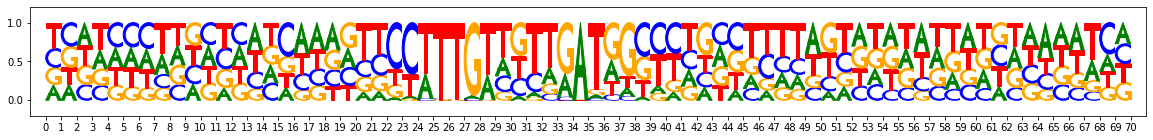

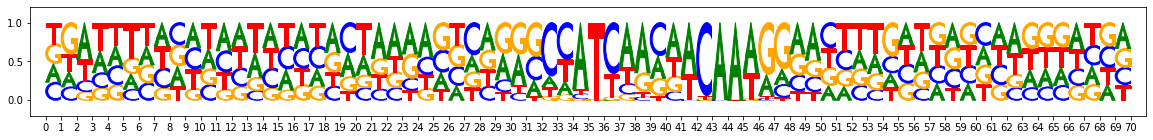

metacluster_0 pattern_24
total seqlets: 71
Task 0 hypothetical scores:


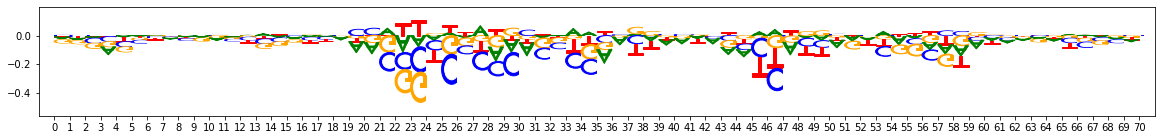

Task 0 actual importance scores:


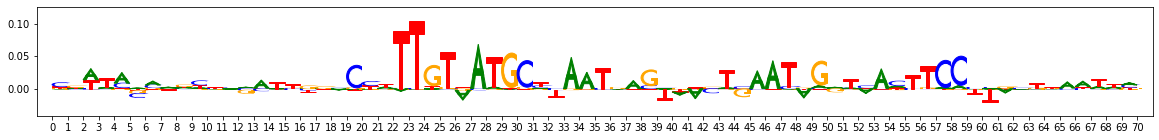

onehot, fwd and rev:


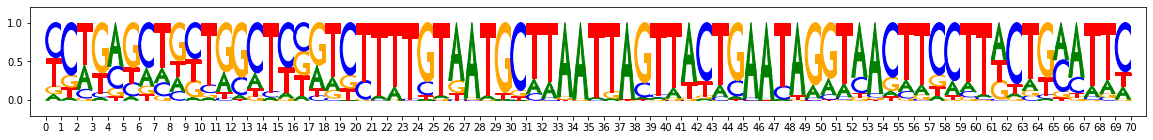

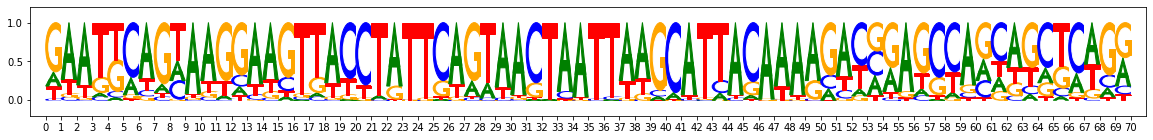

metacluster_0 pattern_25
total seqlets: 76
Task 0 hypothetical scores:


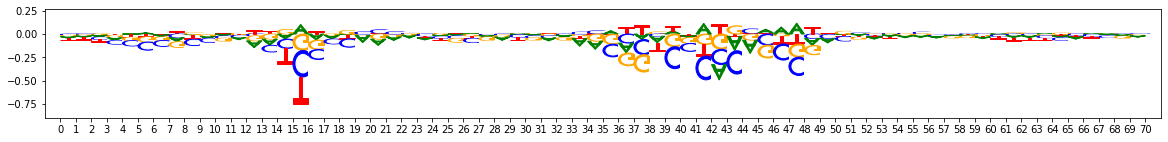

Task 0 actual importance scores:


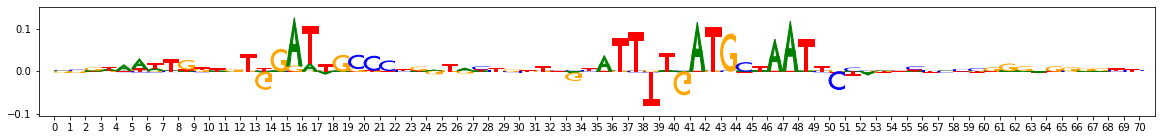

onehot, fwd and rev:


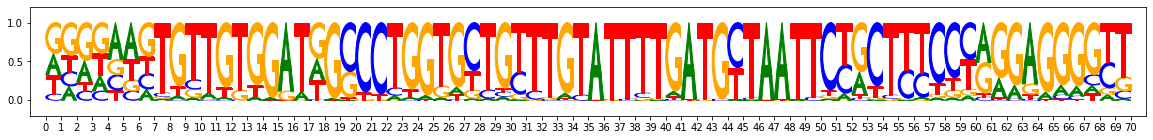

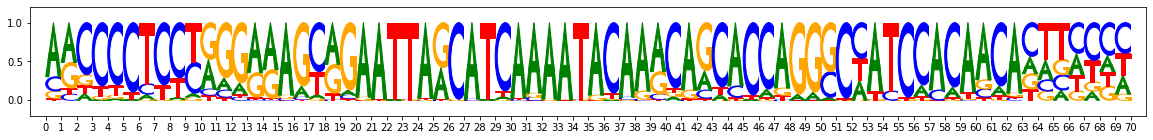

metacluster_0 pattern_26
total seqlets: 97
Task 0 hypothetical scores:


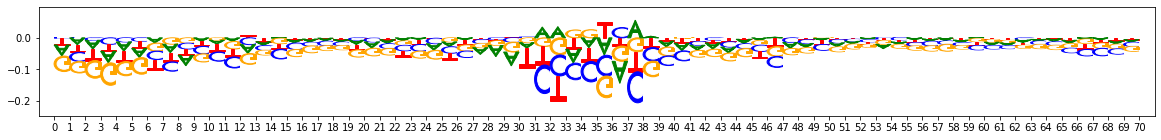

Task 0 actual importance scores:


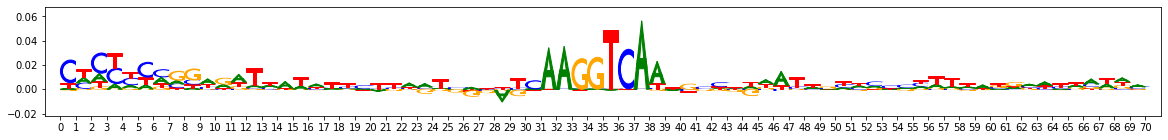

onehot, fwd and rev:


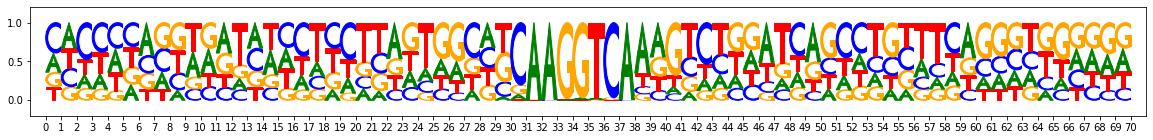

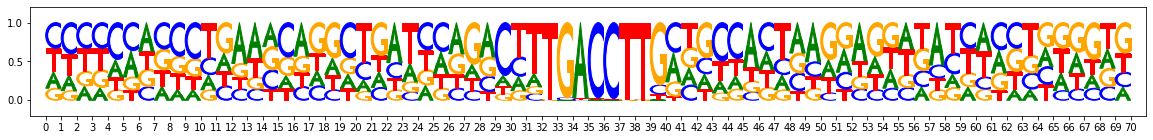

metacluster_0 pattern_27
total seqlets: 62
Task 0 hypothetical scores:


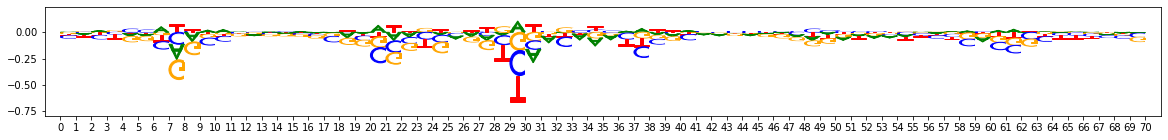

Task 0 actual importance scores:


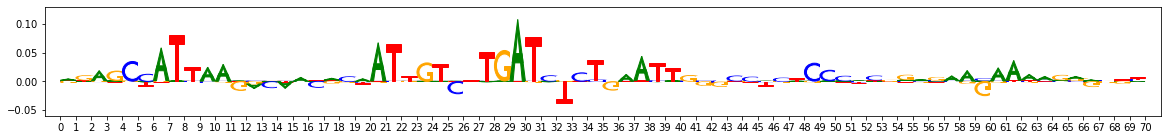

onehot, fwd and rev:


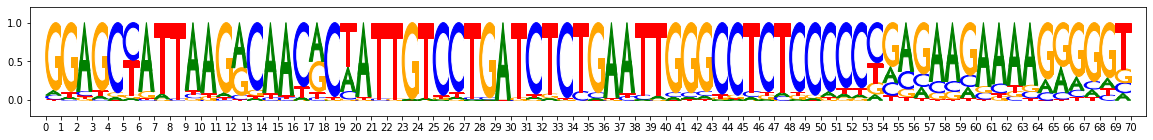

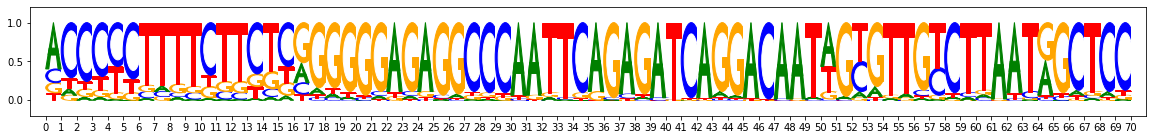

In [11]:
from modisco.visualization import viz_sequence
%matplotlib inline

hdf5_results = h5py.File(file_path,"r")

metacluster_names = [
    x.decode("utf-8") for x in 
    list(hdf5_results["metaclustering_results"]
         ["all_metacluster_names"][:])]

all_patterns = []
background = np.array([0.27, 0.23, 0.23, 0.27])

for metacluster_name in metacluster_names:
    print(metacluster_name)
    metacluster_grp = (hdf5_results["metacluster_idx_to_submetacluster_results"]
                                   [metacluster_name])
    print("activity pattern:",metacluster_grp["activity_pattern"][:])
    all_pattern_names = [x.decode("utf-8") for x in 
                         list(metacluster_grp["seqlets_to_patterns_result"]
                                             ["patterns"]["all_pattern_names"][:])]
    if (len(all_pattern_names)==0):
        print("No motifs found for this activity pattern")
    for pattern_name in all_pattern_names:
        print(metacluster_name, pattern_name)
        all_patterns.append((metacluster_name, pattern_name))
        pattern = metacluster_grp["seqlets_to_patterns_result"]["patterns"][pattern_name]
        print("total seqlets:",len(pattern["seqlets_and_alnmts"]["seqlets"]))
        print("Task 0 hypothetical scores:")
        viz_sequence.plot_weights(pattern["Nanog_profile_wn_hypothetical_contribs"]["fwd"])
        print("Task 0 actual importance scores:")
        viz_sequence.plot_weights(pattern["Nanog_profile_wn_contrib_scores"]["fwd"])
        print("onehot, fwd and rev:")
        viz_sequence.plot_weights(np.array(pattern["sequence"]["fwd"])) 
        viz_sequence.plot_weights(np.array(pattern["sequence"]["rev"])) 
        
hdf5_results.close()

In [105]:
with open("agkm_50kseqlets_goingin.txt",'w') as fh:
    fh.write("\n".join("\t".join([
        str(x.coor.example_idx), str(x.coor.start), str(x.coor.end)])
        for x in results.metacluster_idx_to_submetacluster_results[0].seqlets) )
    
with open("agkm_50kseqlets_laststage.txt",'w') as fh:
    fh.write("\n".join("\t".join([
        str(x.coor.example_idx), str(x.coor.start), str(x.coor.end)])
        for x in results.metacluster_idx_to_submetacluster_results[0].seqlets_to_patterns_result.seqlets) )
    
with open("agkm_50kseqlets_esrrb_hits.txt",'w') as fh:
    fh.write("\n".join("\t".join([
        str(x.coor.example_idx), str(x.coor.start+10), str(x.coor.end-10)])
        for y in [18,21]
        for x in results.metacluster_idx_to_submetacluster_results[0].seqlets_to_patterns_result.patterns[y].seqlets))

with open("agkm_50kseqlets_allpattern_hits.txt",'w') as fh:
    fh.write("\n".join("\t".join([
        str(x.coor.example_idx), str(x.coor.start+10), str(x.coor.end-10), str(yidx)])
        for yidx,y in enumerate(results.metacluster_idx_to_submetacluster_results[0].seqlets_to_patterns_result.patterns)
        for x in y.seqlets ))


In [106]:
!bedtools intersect -wa -u -f 1 -a esrrb_2pcseqlets_hits.txt -b agkm_50kseqlets_goingin.txt | wc -l

34


In [107]:
!bedtools intersect -wa -u -f 1 -a esrrb_2pcseqlets_hits.txt -b agkm_50kseqlets_laststage.txt | wc -l

34


In [108]:
!bedtools intersect -wa -u -f 1 -a esrrb_2pcseqlets_hits.txt -b agkm_50kseqlets_allpattern_hits.txt | wc -l

30


In [109]:
!bedtools intersect -wa -u -f 1 -a esrrb_2pcseqlets_hits.txt -b agkm_50kseqlets_esrrb_hits.txt | wc -l

20


In [110]:
#read in the hits that got mis-mapped
!bedtools intersect -wb -f 1 -a esrrb_2pcseqlets_hits.txt -b agkm_50kseqlets_allpattern_hits.txt > retained_hits.txt

460 467 872 427 477 7


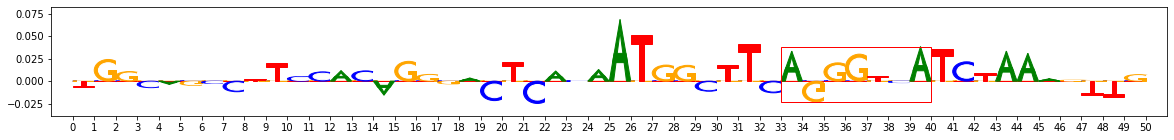

589 596 520 547 597 9


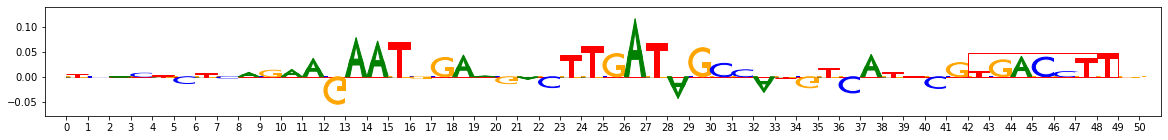

574 581 166 534 584 10


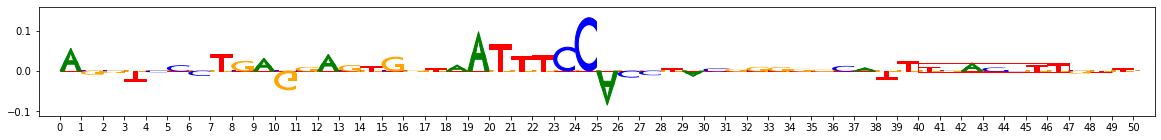

442 449 84 434 484 4


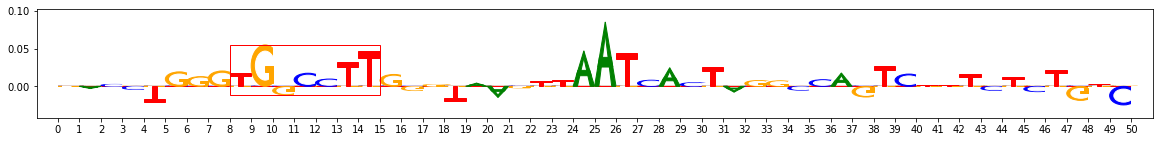

578 585 542 545 595 5


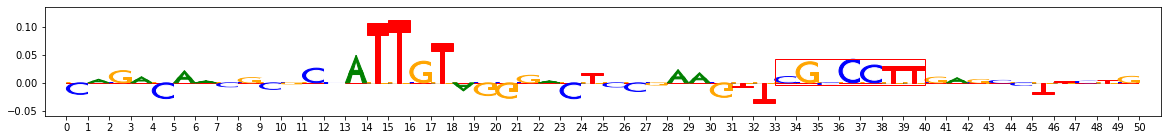

450 457 803 445 495 0


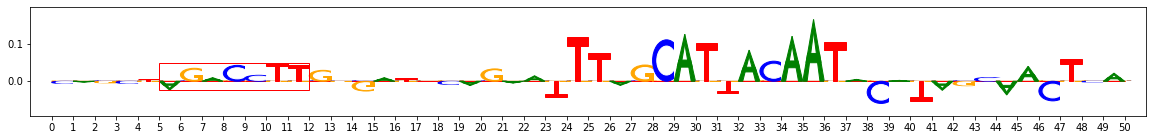

572 579 626 533 583 10


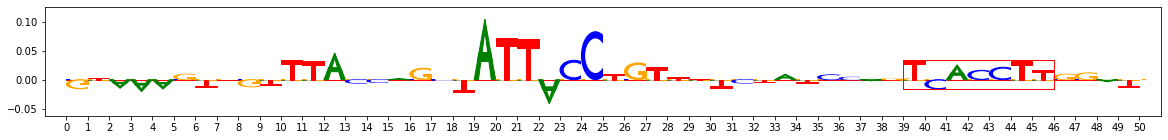

433 440 354 433 483 5


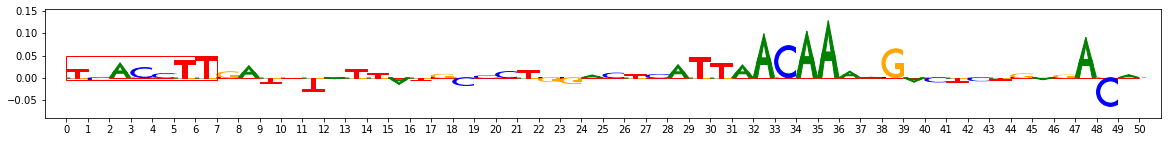

544 551 799 505 555 10


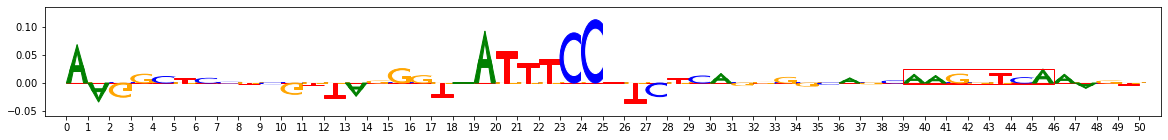

370 377 663 358 408 5


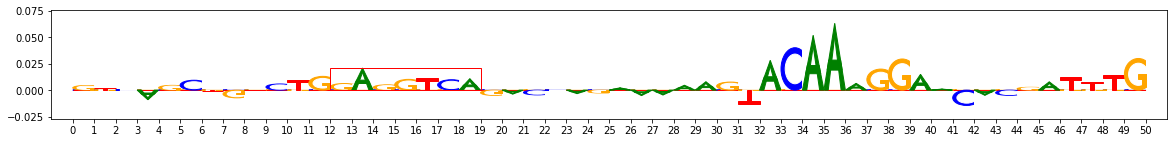

In [113]:
for row in open("retained_hits.txt", "r"):
    _,mstart,mend,ex,seqlstart,seqlend,patternidx = [int(x) for x in row.rstrip().split("\t")]
    if patternidx not in [18,21]:
        print(mstart,mend,ex,seqlstart,seqlend,patternidx)
        viz_sequence.plot_weights(nanog_profile_wn_contribs[ex,seqlstart:seqlend],
                                  highlight={'red':[(mstart-seqlstart, mend-seqlstart)]})

In [103]:
!head retained_hits.txt

635	490	497	635	461	511	18
191	538	545	191	526	576	21
1017	460	467	1017	437	487	18
973	447	454	973	416	466	21
1092	514	521	1092	483	533	21
751	545	552	751	525	575	18
872	460	467	872	427	477	7
419	429	436	419	406	456	18
105	589	596	105	569	619	18
520	589	596	520	547	597	9


In [46]:
!head esrrb_2pcseqlets_hits.txt

635	480	530
191	528	578
282	461	511
1017	450	500
60	580	630
973	414	464
898	523	573
245	517	567
79	527	577
120	537	587


In [37]:
results.metacluster_idx_to_submetacluster_results[0].seqlets_to_patterns_result.seqlets

 ...]

In [42]:
len(results.metacluster_idx_to_submetacluster_results[0].seqlets_to_patterns_result.patterns[21].seqlets)

112